In [1]:
#Importing Packages
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
seed=7

In [3]:
# Importing the dataset
flux = pd.read_excel('LUAD_flux.xlsx',index_col=0)
genes=pd.read_excel('LUAD_Genes.xlsx',index_col=0)

In [4]:
flux.shape

(517, 1962)

In [5]:
flux.head(2)

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,'13HTACRitr','1513TACRitr','1531TACRitr','DEOXFVSitx','FVSitx','TACRitr','13DMTitr','15DMTitr','31DMTitr',Overall Survival (Months)
HUG0_SYMBOL,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,-165.591744,...,14.770344,14.770344,14.770344,-431.370763,431.370763,26.309675,-6.000452,-6.000452,-6.000452,0.00
TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,-73.252506,...,34.017476,34.017476,34.017476,-219.803538,219.803538,60.593629,-13.819600,-13.819600,-13.819600,50.03


In [6]:
del flux['Overall Survival (Months)']

In [7]:
dt = flux.merge(genes,left_index=True,right_index=True)

In [8]:
dt.head()

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,SLTM,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Survival
HUG0_SYMBOL,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,-165.591744,...,-1.1877,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,0.00
TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,-73.252506,...,-0.5540,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,50.03
TCGA-05-4250-01,11.167238,96.659688,-661.410699,-14.973614,185.149045,192.183642,403.670235,74.716367,16.444642,-176.456428,...,-1.3805,0.0730,-0.2752,-1.3034,1.0473,-0.3628,0.0526,-0.8961,-1.1245,3.98
TCGA-05-4382-01,9.813735,152.832310,-413.172469,-7.077201,198.790709,137.492687,161.066009,68.272577,57.663478,-83.597986,...,-0.3885,-1.5611,-0.2752,0.3948,-0.6485,0.5367,-0.9418,-0.1446,2.2863,19.94
TCGA-05-4384-01,10.017708,146.338416,-483.996897,-7.935740,151.432371,58.691049,170.595446,52.965875,55.165456,-87.272646,...,0.4227,0.7651,-0.2752,0.2285,-0.4482,0.5020,0.5863,0.3185,-0.3951,13.99


In [9]:
dt.shape

(517, 16768)

In [10]:
X = dt.iloc[:,0:16767].values
y = dt.iloc[:, -1].values

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [13]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [14]:
def baseline_model():
 #create model
    model = Sequential()
    
    # The Input Layer:
    model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1], activation='relu'))
    
    # The Hidden Layers:
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    
    # The Output Layer:
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    
    # Compile Model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

In [15]:
model = KerasRegressor(build_fn=baseline_model, batch_size=15, epochs=10, verbose=True)

In [16]:
kfold =KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std())) 

Epoch 1/10
297/297 [==============================] - 0s 1ms/sample - loss: 1.2844 - mean_absolute_error: 0.7907
Epoch 2/10
297/297 [==============================] - 0s 715us/sample - loss: 1.0822 - mean_absolute_error: 0.6724
Epoch 3/10
297/297 [==============================] - 0s 710us/sample - loss: 0.6632 - mean_absolute_error: 0.5634
Epoch 4/10
297/297 [==============================] - 0s 706us/sample - loss: 0.4114 - mean_absolute_error: 0.4417
Epoch 5/10
297/297 [==============================] - 0s 714us/sample - loss: 0.6085 - mean_absolute_error: 0.4514
Epoch 6/10
297/297 [==============================] - 0s 707us/sample - loss: 0.2771 - mean_absolute_error: 0.3624
Epoch 7/10
297/297 [==============================] - 0s 705us/sample - loss: 0.2610 - mean_absolute_error: 0.3332
Epoch 8/10
297/297 [==============================] - 0s 713us/sample - loss: 0.3388 - mean_absolute_error: 0.2831
Epoch 9/10
297/297 [==============================] - 0s 709us/sample - loss: 0.20

297/297 [==============================] - 0s 712us/sample - loss: 0.1624 - mean_absolute_error: 0.2608
Epoch 8/10
297/297 [==============================] - 0s 690us/sample - loss: 0.1795 - mean_absolute_error: 0.2610
Epoch 9/10
297/297 [==============================] - 0s 697us/sample - loss: 0.3310 - mean_absolute_error: 0.2710
Epoch 10/10
33/33 [==============================] - 0s 2ms/sample - loss: 1.6010 - mean_absolute_error: 0.7689
Epoch 1/10
297/297 [==============================] - 0s 1ms/sample - loss: 1.3184 - mean_absolute_error: 0.8217
Epoch 2/10
297/297 [==============================] - 0s 693us/sample - loss: 1.0598 - mean_absolute_error: 0.6907
Epoch 3/10
297/297 [==============================] - 0s 699us/sample - loss: 0.5098 - mean_absolute_error: 0.5090
Epoch 4/10
297/297 [==============================] - 0s 706us/sample - loss: 0.3077 - mean_absolute_error: 0.3640
Epoch 5/10
297/297 [==============================] - 0s 698us/sample - loss: 0.3953 - mean_abso

In [17]:
model.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 0s 1ms/sample - loss: 1.3066 - mean_absolute_error: 0.8119
Epoch 2/10
330/330 [==============================] - 0s 698us/sample - loss: 0.9745 - mean_absolute_error: 0.6608
Epoch 3/10
330/330 [==============================] - 0s 698us/sample - loss: 0.5805 - mean_absolute_error: 0.5384
Epoch 4/10
330/330 [==============================] - 0s 711us/sample - loss: 0.4852 - mean_absolute_error: 0.4767
Epoch 5/10
330/330 [==============================] - 0s 725us/sample - loss: 0.2704 - mean_absolute_error: 0.3487
Epoch 6/10
330/330 [==============================] - 0s 716us/sample - loss: 0.3850 - mean_absolute_error: 0.3467
Epoch 7/10
330/330 [==============================] - 0s 757us/sample - loss: 0.1966 - mean_absolute_error: 0.2621
Epoch 8/10
330/330 [==============================] - 0s 724us/sample - loss: 0.2304 - mean_absolute_error: 0.2719
Epoch 9/10
330/330 [==============================] - 0s 695us/sample - loss: 0.11

In [18]:
y_predval = model.predict(X_val)

83/83 [==============================] - 0s 306us/sample


In [19]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

55299033378767.25
9.197858492694382e+28
303279714004982.25
R2 Score
-1.3202710184304142e+29


R^2 = -132027101843041415164252389376.0000


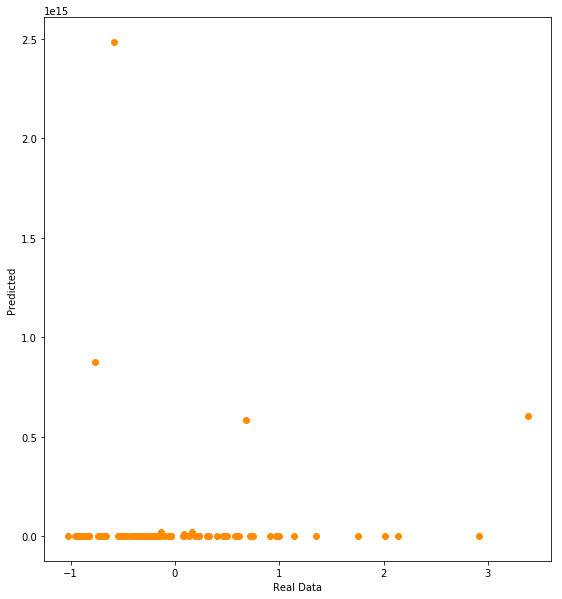

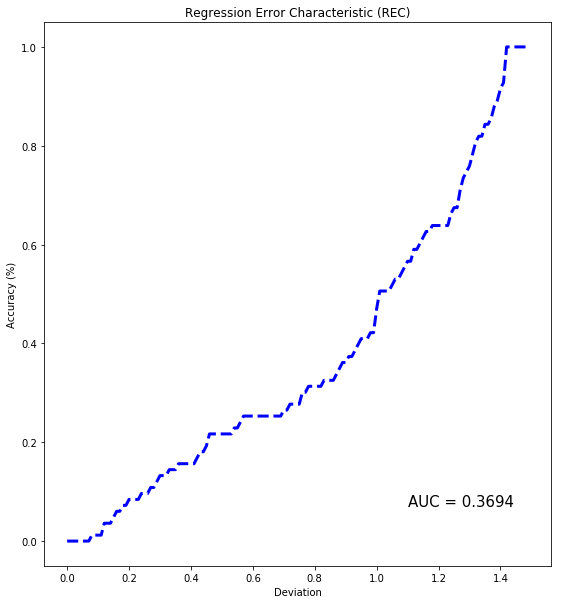

In [21]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()

In [22]:
# define the grid search paramerters
batch_size = [5, 10, 15, 20]
epochs = [10, 20,30,40]

In [23]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

/Users/Zayeem/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
220/220 [==============================] - 1s 3ms/sample - loss: 1.4378 - mean_absolute_error: 0.8441
Epoch 2/10
220/220 [==============================] - 0s 2ms/sample - loss: 1.1782 - mean_absolute_error: 0.6856
Epoch 3/10
220/220 [==============================] - 0s 2ms/sample - loss: 1.2386 - mean_absolute_error: 0.6970
Epoch 4/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.5437 - mean_absolute_error: 0.4705
Epoch 5/10
220/220 [==============================] - 0s 2ms/sample - loss: 1.5900 - mean_absolute_error: 0.5893
Epoch 6/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.6860 - mean_absolute_error: 0.4573
Epoch 7/10
220/220 [==============================] - 1s 2ms/sample - loss: 0.3931 - mean_absolute_error: 0.3440
Epoch 8/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.4169 - mean_absolute_error: 0.3448
Epoch 9/10
220/220 [==============================] - 0s 2ms/sample - loss: 0.4435 - mean_absolu

Epoch 16/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0424 - mean_absolute_error: 0.1205
Epoch 17/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0826 - mean_absolute_error: 0.1165
Epoch 18/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0256 - mean_absolute_error: 0.0965
Epoch 19/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.0178 - mean_absolute_error: 0.0770
Epoch 20/20
220/220 [==============================] - 0s 367us/sample - loss: 0.0126 - mean_absolute_error: 0.0682
Epoch 1/20
220/220 [==============================] - 1s 3ms/sample - loss: 1.9661 - mean_absolute_error: 1.0078
Epoch 2/20
220/220 [==============================] - 0s 2ms/sample - loss: 1.2693 - mean_absolute_error: 0.7722
Epoch 3/20
220/220 [==============================] - 0s 2ms/sample - loss: 0.7055 - mean_absolute_error: 0.5897
Epoch 4/20
220/220 [==============================] - 0s 2ms/sample - loss: 1.3826 - mean

220/220 [==============================] - 0s 2ms/sample - loss: 0.1284 - mean_absolute_error: 0.1657
Epoch 13/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0850 - mean_absolute_error: 0.1483
Epoch 14/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0357 - mean_absolute_error: 0.1039
Epoch 15/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0367 - mean_absolute_error: 0.0885
Epoch 16/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0345 - mean_absolute_error: 0.1012
Epoch 17/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0838 - mean_absolute_error: 0.1211
Epoch 18/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0505 - mean_absolute_error: 0.1185
Epoch 19/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0463 - mean_absolute_error: 0.1095
Epoch 20/30
220/220 [==============================] - 0s 2ms/sample - loss: 0.0404 - mean_absolute_

220/220 [==============================] - 0s 2ms/sample - loss: 0.3101 - mean_absolute_error: 0.1878
Epoch 21/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.3760 - mean_absolute_error: 0.1728
Epoch 22/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.4351 - mean_absolute_error: 0.2089
Epoch 23/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.3086 - mean_absolute_error: 0.1768
Epoch 24/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1363 - mean_absolute_error: 0.1810
Epoch 25/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.4607 - mean_absolute_error: 0.1955
Epoch 26/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2835 - mean_absolute_error: 0.1903
Epoch 27/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1482 - mean_absolute_error: 0.1952
Epoch 28/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.5054 - mean_absolute_

220/220 [==============================] - 0s 2ms/sample - loss: 0.5249 - mean_absolute_error: 0.3478
Epoch 9/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.6107 - mean_absolute_error: 0.3912
Epoch 10/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.4259 - mean_absolute_error: 0.3277
Epoch 11/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1594 - mean_absolute_error: 0.2550
Epoch 12/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.3645 - mean_absolute_error: 0.2078
Epoch 13/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2018 - mean_absolute_error: 0.1951
Epoch 14/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2503 - mean_absolute_error: 0.2433
Epoch 15/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.2783 - mean_absolute_error: 0.1840
Epoch 16/40
220/220 [==============================] - 0s 2ms/sample - loss: 0.1958 - mean_absolute_e

220/220 [==============================] - 0s 1ms/sample - loss: 1.1812 - mean_absolute_error: 0.6968
Epoch 3/20
220/220 [==============================] - 0s 1ms/sample - loss: 0.7089 - mean_absolute_error: 0.5091
Epoch 4/20
220/220 [==============================] - 0s 1ms/sample - loss: 0.3947 - mean_absolute_error: 0.4363
Epoch 5/20
220/220 [==============================] - 0s 1ms/sample - loss: 0.3242 - mean_absolute_error: 0.3636
Epoch 6/20
220/220 [==============================] - 0s 1ms/sample - loss: 0.3699 - mean_absolute_error: 0.3289
Epoch 7/20
220/220 [==============================] - 0s 1ms/sample - loss: 0.2618 - mean_absolute_error: 0.2580
Epoch 8/20
220/220 [==============================] - 0s 1ms/sample - loss: 0.2052 - mean_absolute_error: 0.2427
Epoch 9/20
220/220 [==============================] - 0s 1ms/sample - loss: 0.3390 - mean_absolute_error: 0.2717
Epoch 10/20
220/220 [==============================] - 0s 1ms/sample - loss: 0.0854 - mean_absolute_error: 

220/220 [==============================] - 0s 1ms/sample - loss: 0.2028 - mean_absolute_error: 0.2301
Epoch 9/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.3194 - mean_absolute_error: 0.2351
Epoch 10/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.3095 - mean_absolute_error: 0.2663
Epoch 11/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1978 - mean_absolute_error: 0.2310
Epoch 12/30
220/220 [==============================] - 0s 964us/sample - loss: 0.3207 - mean_absolute_error: 0.2217
Epoch 13/30
220/220 [==============================] - 0s 964us/sample - loss: 0.1074 - mean_absolute_error: 0.1800
Epoch 14/30
220/220 [==============================] - 0s 996us/sample - loss: 0.2753 - mean_absolute_error: 0.1889
Epoch 15/30
220/220 [==============================] - 0s 986us/sample - loss: 0.2806 - mean_absolute_error: 0.1827
Epoch 16/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1525 - mean_ab

220/220 [==============================] - 0s 1ms/sample - loss: 0.0390 - mean_absolute_error: 0.0835
Epoch 17/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1139 - mean_absolute_error: 0.0968
Epoch 18/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.0216 - mean_absolute_error: 0.0911
Epoch 19/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.0689 - mean_absolute_error: 0.1044
Epoch 20/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.2167 - mean_absolute_error: 0.1267
Epoch 21/30
220/220 [==============================] - 0s 986us/sample - loss: 0.0688 - mean_absolute_error: 0.1128
Epoch 22/30
220/220 [==============================] - 0s 975us/sample - loss: 0.2829 - mean_absolute_error: 0.2347
Epoch 23/30
220/220 [==============================] - 0s 987us/sample - loss: 0.3453 - mean_absolute_error: 0.2227
Epoch 24/30
220/220 [==============================] - 0s 1ms/sample - loss: 0.1392 - mean_abs

220/220 [==============================] - 0s 1ms/sample - loss: 0.0529 - mean_absolute_error: 0.1419
Epoch 15/40
220/220 [==============================] - 0s 1ms/sample - loss: 0.0396 - mean_absolute_error: 0.1165
Epoch 16/40
220/220 [==============================] - 0s 1ms/sample - loss: 0.0463 - mean_absolute_error: 0.1172
Epoch 17/40
220/220 [==============================] - 0s 1ms/sample - loss: 0.0481 - mean_absolute_error: 0.1041
Epoch 18/40
220/220 [==============================] - 0s 1ms/sample - loss: 0.0273 - mean_absolute_error: 0.1027
Epoch 19/40
220/220 [==============================] - 0s 1ms/sample - loss: 0.0223 - mean_absolute_error: 0.0899
Epoch 20/40
220/220 [==============================] - 0s 1ms/sample - loss: 0.0363 - mean_absolute_error: 0.1025
Epoch 21/40
220/220 [==============================] - 0s 976us/sample - loss: 0.0290 - mean_absolute_error: 0.0965
Epoch 22/40
220/220 [==============================] - 0s 993us/sample - loss: 0.0217 - mean_absol

220/220 [==============================] - 0s 821us/sample - loss: 1.0350 - mean_absolute_error: 0.6510
Epoch 3/10
220/220 [==============================] - 0s 730us/sample - loss: 0.7823 - mean_absolute_error: 0.5467
Epoch 4/10
220/220 [==============================] - 0s 818us/sample - loss: 0.5521 - mean_absolute_error: 0.5339
Epoch 5/10
220/220 [==============================] - 0s 775us/sample - loss: 0.6447 - mean_absolute_error: 0.4433
Epoch 6/10
220/220 [==============================] - 0s 718us/sample - loss: 0.4366 - mean_absolute_error: 0.3981
Epoch 7/10
220/220 [==============================] - 0s 685us/sample - loss: 0.2080 - mean_absolute_error: 0.2716
Epoch 8/10
220/220 [==============================] - 0s 700us/sample - loss: 0.1811 - mean_absolute_error: 0.2299
Epoch 9/10
220/220 [==============================] - 0s 727us/sample - loss: 0.3245 - mean_absolute_error: 0.2898
Epoch 10/10
220/220 [==============================] - 0s 162us/sample - loss: 0.0761 - mea

Epoch 16/20
220/220 [==============================] - 0s 776us/sample - loss: 0.1157 - mean_absolute_error: 0.1459
Epoch 17/20
220/220 [==============================] - 0s 788us/sample - loss: 0.0680 - mean_absolute_error: 0.1163
Epoch 18/20
220/220 [==============================] - 0s 800us/sample - loss: 0.0191 - mean_absolute_error: 0.0816
Epoch 19/20
220/220 [==============================] - 0s 784us/sample - loss: 0.0204 - mean_absolute_error: 0.0777
Epoch 20/20
220/220 [==============================] - 0s 203us/sample - loss: 0.0275 - mean_absolute_error: 0.0913
Epoch 1/20
220/220 [==============================] - 0s 1ms/sample - loss: 1.6124 - mean_absolute_error: 0.9157
Epoch 2/20
220/220 [==============================] - 0s 799us/sample - loss: 1.4105 - mean_absolute_error: 0.8218
Epoch 3/20
220/220 [==============================] - 0s 767us/sample - loss: 0.6360 - mean_absolute_error: 0.5736
Epoch 4/20
220/220 [==============================] - 0s 741us/sample - loss:

220/220 [==============================] - 0s 690us/sample - loss: 0.1204 - mean_absolute_error: 0.1982
Epoch 12/30
220/220 [==============================] - 0s 713us/sample - loss: 0.0726 - mean_absolute_error: 0.1838
Epoch 13/30
220/220 [==============================] - 0s 696us/sample - loss: 0.0805 - mean_absolute_error: 0.1673
Epoch 14/30
220/220 [==============================] - 0s 760us/sample - loss: 0.0359 - mean_absolute_error: 0.1120
Epoch 15/30
220/220 [==============================] - 0s 803us/sample - loss: 0.0318 - mean_absolute_error: 0.0991
Epoch 16/30
220/220 [==============================] - 0s 717us/sample - loss: 0.0320 - mean_absolute_error: 0.0892
Epoch 17/30
220/220 [==============================] - 0s 705us/sample - loss: 0.0484 - mean_absolute_error: 0.0900
Epoch 18/30
220/220 [==============================] - 0s 703us/sample - loss: 0.0203 - mean_absolute_error: 0.0757
Epoch 19/30
220/220 [==============================] - 0s 807us/sample - loss: 0.009

220/220 [==============================] - 0s 949us/sample - loss: 0.2890 - mean_absolute_error: 0.2207
Epoch 19/40
220/220 [==============================] - 0s 791us/sample - loss: 0.2901 - mean_absolute_error: 0.1884
Epoch 20/40
220/220 [==============================] - 0s 769us/sample - loss: 0.3266 - mean_absolute_error: 0.1825
Epoch 21/40
220/220 [==============================] - 0s 796us/sample - loss: 0.3364 - mean_absolute_error: 0.2043
Epoch 22/40
220/220 [==============================] - 0s 784us/sample - loss: 0.1186 - mean_absolute_error: 0.1745
Epoch 23/40
220/220 [==============================] - 0s 763us/sample - loss: 0.1304 - mean_absolute_error: 0.1622
Epoch 24/40
220/220 [==============================] - 0s 789us/sample - loss: 0.1900 - mean_absolute_error: 0.1276
Epoch 25/40
220/220 [==============================] - 0s 806us/sample - loss: 0.1928 - mean_absolute_error: 0.1369
Epoch 26/40
220/220 [==============================] - 0s 776us/sample - loss: 0.194

220/220 [==============================] - 0s 776us/sample - loss: 0.4626 - mean_absolute_error: 0.3985
Epoch 6/40
220/220 [==============================] - 0s 762us/sample - loss: 0.5984 - mean_absolute_error: 0.4008
Epoch 7/40
220/220 [==============================] - 0s 752us/sample - loss: 0.2524 - mean_absolute_error: 0.3341
Epoch 8/40
220/220 [==============================] - 0s 751us/sample - loss: 0.3591 - mean_absolute_error: 0.2984
Epoch 9/40
220/220 [==============================] - 0s 778us/sample - loss: 0.2956 - mean_absolute_error: 0.2542
Epoch 10/40
220/220 [==============================] - 0s 765us/sample - loss: 0.0845 - mean_absolute_error: 0.1960
Epoch 11/40
220/220 [==============================] - 0s 760us/sample - loss: 0.2555 - mean_absolute_error: 0.2109
Epoch 12/40
220/220 [==============================] - 0s 754us/sample - loss: 0.3546 - mean_absolute_error: 0.2635
Epoch 13/40
220/220 [==============================] - 0s 772us/sample - loss: 0.2164 - 

220/220 [==============================] - 0s 161us/sample - loss: 0.5365 - mean_absolute_error: 0.2128
Epoch 1/20
220/220 [==============================] - 0s 1ms/sample - loss: 1.3068 - mean_absolute_error: 0.8153
Epoch 2/20
220/220 [==============================] - 0s 577us/sample - loss: 1.1056 - mean_absolute_error: 0.6511
Epoch 3/20
220/220 [==============================] - 0s 574us/sample - loss: 0.7065 - mean_absolute_error: 0.5107
Epoch 4/20
220/220 [==============================] - 0s 572us/sample - loss: 0.3676 - mean_absolute_error: 0.3699
Epoch 5/20
220/220 [==============================] - 0s 569us/sample - loss: 0.1093 - mean_absolute_error: 0.2325
Epoch 6/20
220/220 [==============================] - 0s 553us/sample - loss: 0.0837 - mean_absolute_error: 0.1987
Epoch 7/20
220/220 [==============================] - 0s 649us/sample - loss: 0.1166 - mean_absolute_error: 0.1934
Epoch 8/20
220/220 [==============================] - 0s 625us/sample - loss: 0.1531 - mean_a

220/220 [==============================] - 0s 575us/sample - loss: 0.3955 - mean_absolute_error: 0.4456
Epoch 4/30
220/220 [==============================] - 0s 578us/sample - loss: 0.6558 - mean_absolute_error: 0.4365
Epoch 5/30
220/220 [==============================] - 0s 635us/sample - loss: 0.3316 - mean_absolute_error: 0.3935
Epoch 6/30
220/220 [==============================] - 0s 638us/sample - loss: 0.2939 - mean_absolute_error: 0.3237
Epoch 7/30
220/220 [==============================] - 0s 608us/sample - loss: 0.1846 - mean_absolute_error: 0.2641
Epoch 8/30
220/220 [==============================] - 0s 633us/sample - loss: 0.1774 - mean_absolute_error: 0.2462
Epoch 9/30
220/220 [==============================] - 0s 640us/sample - loss: 0.2560 - mean_absolute_error: 0.1977
Epoch 10/30
220/220 [==============================] - 0s 627us/sample - loss: 0.2538 - mean_absolute_error: 0.1894
Epoch 11/30
220/220 [==============================] - 0s 620us/sample - loss: 0.1910 - me

220/220 [==============================] - 0s 558us/sample - loss: 0.1059 - mean_absolute_error: 0.1930
Epoch 11/30
220/220 [==============================] - 0s 541us/sample - loss: 0.1775 - mean_absolute_error: 0.1661
Epoch 12/30
220/220 [==============================] - 0s 543us/sample - loss: 0.2159 - mean_absolute_error: 0.1926
Epoch 13/30
220/220 [==============================] - 0s 540us/sample - loss: 0.0969 - mean_absolute_error: 0.1832
Epoch 14/30
220/220 [==============================] - 0s 540us/sample - loss: 0.1354 - mean_absolute_error: 0.1811
Epoch 15/30
220/220 [==============================] - 0s 541us/sample - loss: 0.1637 - mean_absolute_error: 0.1768
Epoch 16/30
220/220 [==============================] - 0s 542us/sample - loss: 0.1940 - mean_absolute_error: 0.1911
Epoch 17/30
220/220 [==============================] - 0s 547us/sample - loss: 0.1005 - mean_absolute_error: 0.1623
Epoch 18/30
220/220 [==============================] - 0s 552us/sample - loss: 0.036

220/220 [==============================] - 0s 632us/sample - loss: 0.2176 - mean_absolute_error: 0.3028
Epoch 8/40
220/220 [==============================] - 0s 602us/sample - loss: 0.0934 - mean_absolute_error: 0.2165
Epoch 9/40
220/220 [==============================] - 0s 602us/sample - loss: 0.0837 - mean_absolute_error: 0.1742
Epoch 10/40
220/220 [==============================] - 0s 652us/sample - loss: 0.0526 - mean_absolute_error: 0.1523
Epoch 11/40
220/220 [==============================] - 0s 573us/sample - loss: 0.1115 - mean_absolute_error: 0.1747
Epoch 12/40
220/220 [==============================] - 0s 628us/sample - loss: 0.0602 - mean_absolute_error: 0.1736
Epoch 13/40
220/220 [==============================] - 0s 651us/sample - loss: 0.1030 - mean_absolute_error: 0.1632
Epoch 14/40
220/220 [==============================] - 0s 623us/sample - loss: 0.0466 - mean_absolute_error: 0.1031
Epoch 15/40
220/220 [==============================] - 0s 608us/sample - loss: 0.0313 

220/220 [==============================] - 0s 614us/sample - loss: 0.0224 - mean_absolute_error: 0.0921
Epoch 37/40
220/220 [==============================] - 0s 595us/sample - loss: 0.0311 - mean_absolute_error: 0.1030
Epoch 38/40
220/220 [==============================] - 0s 607us/sample - loss: 0.0245 - mean_absolute_error: 0.0977
Epoch 39/40
220/220 [==============================] - 0s 610us/sample - loss: 0.0215 - mean_absolute_error: 0.0941
Epoch 40/40
220/220 [==============================] - 0s 163us/sample - loss: 0.0250 - mean_absolute_error: 0.0936
Epoch 1/10
330/330 [==============================] - 0s 1ms/sample - loss: 1.2668 - mean_absolute_error: 0.7673
Epoch 2/10
330/330 [==============================] - 0s 1ms/sample - loss: 1.1786 - mean_absolute_error: 0.7280
Epoch 3/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.8461 - mean_absolute_error: 0.5729
Epoch 4/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.4990 - mean_abs

In [24]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1.067579 using {'batch_size': 10, 'epochs': 10}
-1.116583 (0.327422) with: {'batch_size': 5, 'epochs': 10}
-1.189869 (0.325489) with: {'batch_size': 5, 'epochs': 20}
-1.124091 (0.365330) with: {'batch_size': 5, 'epochs': 30}
-1.185570 (0.335989) with: {'batch_size': 5, 'epochs': 40}
-1.067579 (0.354795) with: {'batch_size': 10, 'epochs': 10}
-1.135269 (0.388434) with: {'batch_size': 10, 'epochs': 20}
-1.101784 (0.367456) with: {'batch_size': 10, 'epochs': 30}
-1.079152 (0.402906) with: {'batch_size': 10, 'epochs': 40}
-1.153752 (0.372232) with: {'batch_size': 15, 'epochs': 10}
-1.096518 (0.365415) with: {'batch_size': 15, 'epochs': 20}
-1.126182 (0.383009) with: {'batch_size': 15, 'epochs': 30}
-1.120859 (0.364596) with: {'batch_size': 15, 'epochs': 40}
-1.192733 (0.257901) with: {'batch_size': 20, 'epochs': 10}
-1.146075 (0.368133) with: {'batch_size': 20, 'epochs': 20}
-1.205238 (0.378547) with: {'batch_size': 20, 'epochs': 30}
-1.092387 (0.411949) with: {'batch_size': 20, 'ep

In [25]:
newmodel = KerasRegressor(build_fn=baseline_model, batch_size=10, epochs=10, verbose=True)

In [26]:
newmodel.fit(X_train, y_train)

Epoch 1/10
330/330 [==============================] - 1s 2ms/sample - loss: 1.6222 - mean_absolute_error: 0.9247
Epoch 2/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.9110 - mean_absolute_error: 0.6514
Epoch 3/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.5850 - mean_absolute_error: 0.5072
Epoch 4/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.4695 - mean_absolute_error: 0.4515
Epoch 5/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.3746 - mean_absolute_error: 0.3832
Epoch 6/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.6802 - mean_absolute_error: 0.4958
Epoch 7/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.4303 - mean_absolute_error: 0.4152
Epoch 8/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.5131 - mean_absolute_error: 0.4055
Epoch 9/10
330/330 [==============================] - 0s 1ms/sample - loss: 0.2855 - mean_absolu

In [27]:
y_predval = newmodel.predict(X_val)

83/83 [==============================] - 0s 375us/sample


In [28]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

13591514413130.596
4.593313724180331e+27
67773990027003.21
R2 Score
-6.593294508075736e+27


R^2 = -6593294508075735884708708352.0000


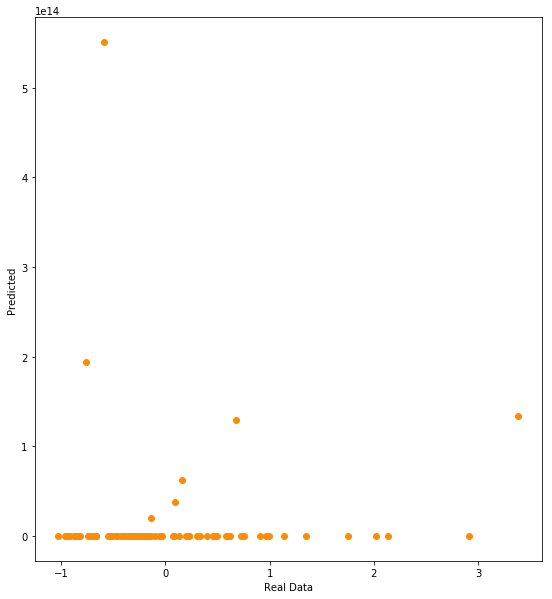

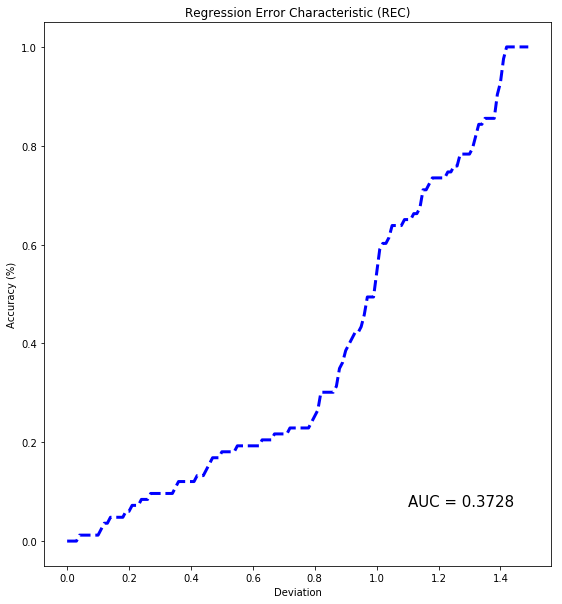

In [29]:
# Visualising the Decision Tree Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()